In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from susy_tools import *

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [4]:
M1 = 300
M2 = 400
mu = 2000
N=10
mass_l = np.linspace(M2, M2 + 80, N)
#m = 2000

#M2_l = np.linspace(M1, 400, N)
#mass_l = [160,161]

changeParamValue("mu(EWSB)", mu)

os.chdir("../new_susyhit")

br_Z = []
br_h = []
br_tau = []
br_nutau = []
br_fR = []
br_fL = []

n1 = []
n2 = [] 

tau = []
mu_L = []
mu_R = []
nu_tau = []
h = []

for m in mass_l:
    
    print(".", end="")
    
    changeParamValue("M_eL", m)
    changeParamValue("M_eR",  m)
    changeParamValue("M_muL", m)
    changeParamValue("M_muR", m)
    changeParamValue("M_tauL", m)
    changeParamValue("M_tauR", m)
    
    
    changeParamValue("M_1", M1)
    changeParamValue("M_2", M2)    
    
    os.system("./run")
        
    with open("./susyhit_slha.out") as f:
        s = f.read()

    n1.append( getParamValue(s, "~chi_10") )
    n2.append( getParamValue(s, "~chi_20") )
    tau.append( getParamValue(s, "~tau_1") )
    nu_tau.append( getParamValue(s, "~nu_tauL") )
    mu_L.append( getParamValue(s, "~mu_L") )
    mu_R.append( getParamValue(s, "~mu_R") )
    h.append( getParamValue(s, "h") )
    """
    br_x2_to_x10_h = getBrRatio(s, "# BR(~chi_20 -> ~chi_10   h )")
    br_x2_to_x10_Z = getBrRatio(s, "# BR(~chi_20 -> ~chi_10   Z )")
    
    br_x2_to_tau = (getBrRatio(s, "# BR(~chi_20 -> ~tau_1-   tau+)") +
                    getBrRatio(s, "# BR(~chi_20 -> ~tau_1+   tau-)"))

    br_x2_to_nutau = (getBrRatio(s, "# BR(~chi_20 -> ~nu_tau1  nu_taub)") +
                    getBrRatio(s,   "# BR(~chi_20 -> ~nu_tau1* nu_tau )"))
    
    br_x2_to_fL = getBrRatio(s, "# BR(~chi_20 -> ~mu_L-    mu+)" )
    br_x2_to_fR = getBrRatio(s, "# BR(~chi_20 -> ~mu_R-    mu+)" )

    br_Z.append(br_x2_to_x10_Z)
    br_h.append(br_x2_to_x10_h)
    br_tau.append(br_x2_to_tau)
    br_nutau.append(br_x2_to_nutau)
    br_fR.append(br_x2_to_fR)
    br_fL.append(br_x2_to_fL)"""

..........

Text(464.0, 0.00193884534007763, 'M1 = 300 \nM2 = 400 \n$\\mu$ = 2000')

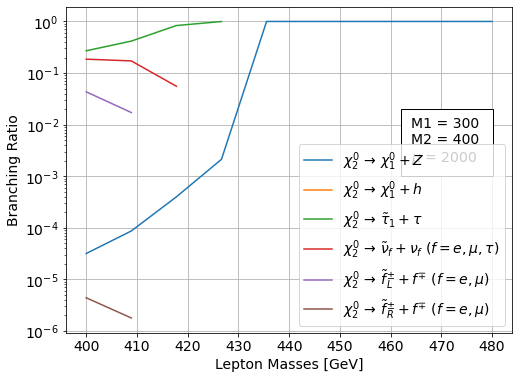

In [257]:
plt.figure(figsize=(8,6))

plt.plot(mass_l, br_Z)
plt.plot(mass_l, br_h)
plt.plot(mass_l, br_tau)
plt.plot(mass_l, br_nutau)

if len(br_fL) - sum(np.isnan(br_fL)) > 1:
    plt.plot(mass_l, br_fL)
    plt.plot(mass_l, br_fR)

plt.yscale("log")
plt.legend([r"$\chi_2^0 \ \to \ \chi_1^0 + Z$",
           r"$\chi_2^0 \ \to \ \chi_1^0 + h$",
           r"$\chi_2^0 \ \to \ \~\tau_1 + \tau$",
           r"$\chi_2^0 \ \to \ \~\nu_f + \nu_f \ (f=e,\mu,\tau)$",
           r"$\chi_2^0 \ \to \ \~f_L^{\pm} + f^{\mp} \ (f=e,\mu)$",
           r"$\chi_2^0 \ \to \ \~f_R^{\pm} + f^{\mp} \ (f=e,\mu)$"])
plt.ylabel("Branching Ratio")
plt.xlabel("Lepton Masses [GeV]")

plt.grid()
plt.text(plt.xlim()[1]-20, 0.001*plt.ylim()[1], "M1 = %i \nM2 = %i \n" % (M1, M2) + r"$\mu$ = %i" % mu,
         bbox=dict(facecolor='white', edgecolor='black', pad=10.0) )

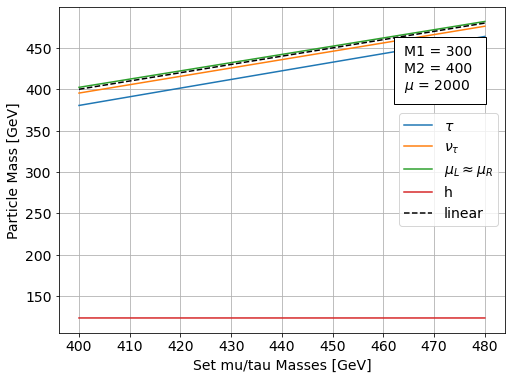

In [6]:
plt.figure(figsize=(8,6))
#plt.plot(mass_l, n2)
#plt.plot(mass_l,  n1)
plt.plot(mass_l,  tau)
plt.plot(mass_l,  nu_tau)
plt.plot(mass_l,  mu_L)
plt.plot(mass_l,  h)
plt.plot(mass_l,  mass_l, ls="dashed", c="black")


plt.yscale("linear")
plt.xscale("linear")
plt.legend([r"$\tau$", r"$\nu_\tau$",
           r"$\mu_L \approx \mu_R$", "h", "linear"])
plt.ylabel("Particle Mass [GeV]")
plt.xlabel("Set mu/tau Masses [GeV]")

plt.text(plt.xlim()[1]-20, plt.ylim()[1]-100, "M1 = %i \nM2 = %i \n" % (M1, M2) + r"$\mu$ = %i" % mu,
         bbox=dict(facecolor='white', edgecolor='black', pad=10.0) )
plt.grid()

In [252]:
M1 = 300
M2 = 400
mu = 2000
N=15
mass_l = np.linspace(M2+20, M2 + 50, N)
#m = 2000

M2_l = np.linspace(400, 403, 4)
#mass_l = [160,161]

changeParamValue("mu(EWSB)", mu)

os.chdir("../new_susyhit")


br_l = []
for M2 in M2_l:
    n1 = []
    n2 = [] 
    h = []
    br_h = []
    
    print(".", end="")

    for m in mass_l:


        changeParamValue("M_eL", m)
        changeParamValue("M_eR",  m)
        changeParamValue("M_muL", m)
        changeParamValue("M_muR", m)
        changeParamValue("M_tauL", m)
        changeParamValue("M_tauR", m)


        changeParamValue("M_1", M1)
        changeParamValue("M_2", M2)    

        os.system("./run")

        with open("./susyhit_slha.out") as f:
            s = f.read()

        n1.append( getParamValue(s, "~chi_10") )
        n2.append( getParamValue(s, "~chi_20") )
        h.append( getParamValue(s, "h") )

        br_x2_to_x10_h = getBrRatio(s, "# BR(~chi_20 -> ~chi_10   h )")
        br_h.append(br_x2_to_x10_h)
    
    br_l.append(br_h)

....

In [69]:
M1 = 100
M2 = 100

mu = 1000
tanB=10
N=40
mass_l = np.linspace(80, 200, N)
#m = 2000

#mass_l = [160,161]

m_x1 = []
m_x2 = []

changeParamValue("mu(EWSB)", mu)
changeParamValue("tanbeta(MZ)", tanB)

os.chdir("../new_susyhit")



changeParamValue("M_eL", m)
changeParamValue("M_eR",  m)
changeParamValue("M_muL", m)
changeParamValue("M_muR", m)
changeParamValue("M_tauL", m)
changeParamValue("M_tauR", m)

for m in mass_l:



    changeParamValue("M_1", M1)
    changeParamValue("M_2", m)    

    os.system("./run")

    with open("./susyhit_slha.out") as f:
        s = f.read()

    m_x1.append( getParamValue(s, "~chi_10"))
    m_x2.append( getParamValue(s, "~chi_20"))
    print( getParamValue(s, "h") )


129.177141
129.165873
129.154894
129.144167
129.133636
129.123296
129.113118
129.103077
129.093154
129.083341
129.073627
129.063991
129.054438
129.044955
129.035533
129.026168
129.01686
129.007594
128.998372
128.989193
128.980052
128.970945
128.961878
128.952841
128.943837
128.93486
128.925921
128.917006
128.908131
128.89928
128.890466
128.881687
128.872949
128.864248
128.855593
128.846994
128.838452
128.82998
128.821593
128.813329


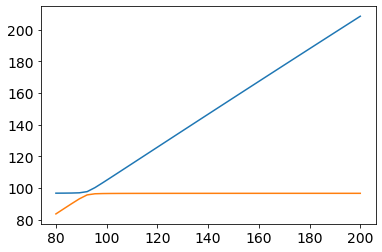

In [70]:
plt.plot(mass_l, np.array([m_x2,m_x1]).T)

In [66]:
-np.array(m_x1)+np.array(m_x2)

array([  8.4128716,  76.1555913, 143.332914 , 209.9023062, 275.9428231,
       341.4906539, 406.5465362, 471.0725351, 534.9779259, 598.0808899,
       660.0222511, 720.0508342, 776.4702748, 825.6460262, 861.3841127])

In [53]:
Mz = 91.
swsq = 0.25

print(-Mz**2/mu*swsq*(np.sin(2*np.arctan(tanB)) + M1/mu))
print(Mz**2/mu*(1-swsq)*(np.sin(2*np.arctan(tanB)) + M2/mu))

-0.08003904999999999
0.24508574999999996


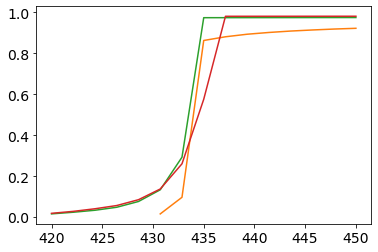

In [253]:
plt.plot(mass_l, np.array(br_l).T)